In [3]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.0-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [36]:
#the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('student_prediction.csv')

In [3]:
df["GRADE"].value_counts()

GRADE
1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: count, dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,145.0,1.620690,0.613154,1.0,1.0,2.0,2.0,3.0
GENDER,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
HS_TYPE,145.0,1.944828,0.537216,1.0,2.0,2.0,2.0,3.0
SCHOLARSHIP,145.0,3.572414,0.805750,1.0,3.0,3.0,4.0,5.0
WORK,145.0,1.662069,0.474644,1.0,1.0,2.0,2.0,2.0
ACTIVITY,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
PARTNER,145.0,1.579310,0.495381,1.0,1.0,2.0,2.0,2.0
SALARY,145.0,1.627586,1.020245,1.0,1.0,1.0,2.0,5.0
TRANSPORT,145.0,1.620690,1.061112,1.0,1.0,1.0,2.0,4.0
LIVING,145.0,1.731034,0.783999,1.0,1.0,2.0,2.0,4.0


In [5]:
df["COURSE ID"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df.describe(include=object)

#see unique values

,STUDENTID
count,145
unique,145
top,STUDENT1
freq,1


In [7]:
df = df.drop('STUDENTID', axis=1)

#drop unique values

In [8]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

#no duplicates

Duplicate Rows :


,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE


In [9]:
X = df.drop(columns=['GRADE'])  # Drop the target column
y = df['GRADE']  # Target is 'GRADE' column

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [11]:
# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=82)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: GRADE
1    28
2    18
3    16
5    15
7    14
6    11
4     8
0     6
Name: count, dtype: int64
After SMOTE: GRADE
1    28
3    28
5    28
6    28
7    28
2    28
4    28
0    28
Name: count, dtype: int64


In [12]:
# Train a Random Forest Regressor on the resampled data
model = RandomForestRegressor(random_state=12)
model.fit(X_train_resampled, y_train_resampled)

RandomForestRegressor(random_state=12)

In [13]:
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.9007068965517242
R-squared: 0.5689065533980582


not so good results...

In [15]:
# Fit the Random Forest model on the original training set
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))


        Feature  Importance
30    COURSE ID    0.513184
28     CUML_GPA    0.101210
1        GENDER    0.057195
25      LISTENS    0.026693
12   #_SIBLINGS    0.024799
16    STUDY_HRS    0.021408
3   SCHOLARSHIP    0.020274
10   MOTHER_EDU    0.019390
29      EXP_GPA    0.017512
15   FATHER_JOB    0.017442


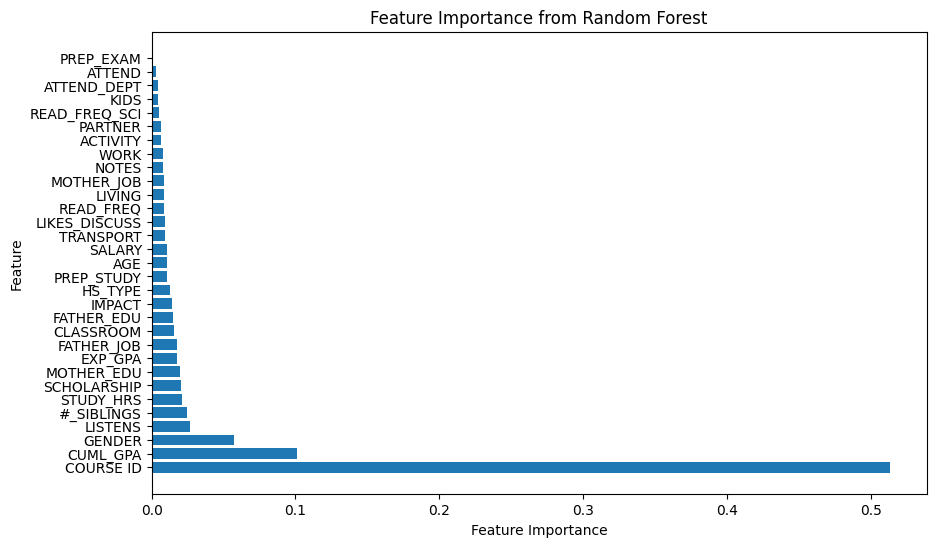

In [16]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [17]:
# Select features that are more important (based on a threshold, for example > 0.01)
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]

# Filter the dataset to keep only important features
X_train_important = X_train[important_features['Feature']]
X_test_important = X_test[important_features['Feature']]

# Check the updated feature list
print(X_train_important.columns)


Index(['COURSE ID', 'CUML_GPA', 'GENDER', 'LISTENS', '#_SIBLINGS', 'STUDY_HRS',
       'SCHOLARSHIP', 'MOTHER_EDU', 'EXP_GPA', 'FATHER_JOB', 'CLASSROOM',
       'FATHER_EDU', 'IMPACT', 'HS_TYPE', 'PREP_STUDY', 'AGE', 'SALARY'],
      dtype='object')


In [18]:
# Train the model with the important features
model_important = RandomForestRegressor(random_state=42)
model_important.fit(X_train_important, y_train)

# Make predictions
y_pred_important = model_important.predict(X_test_important)

# Evaluate the model
mse_important = mean_squared_error(y_test, y_pred_important)
r2_important = r2_score(y_test, y_pred_important)

print(f"Mean Squared Error (with important features): {mse_important}")
print(f"R-squared (with important features): {r2_important}")


Mean Squared Error (with important features): 1.6639448275862072
R-squared (with important features): 0.6226058252427182


the results elevated, but let's see if there is still something to do

In [19]:
# Train the Gradient Boosting Regressor on the important features
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train_important, y_train)

# Make predictions
y_pred_gb = model_gb.predict(X_test_important)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")
print(f"R-squared (Gradient Boosting): {r2_gb}")


Mean Squared Error (Gradient Boosting): 1.8502040865164806
R-squared (Gradient Boosting): 0.580360939385016


let's improve thsi

In [20]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking to avoid overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of individual trees
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=66)


In [21]:
# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)  # Use all processors


In [22]:
# Fit the GridSearchCV on the training data
grid_search.fit(X_train_important, y_train)

# Get the best parameters and best model from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best hyperparameters
print("Best hyperparameters found: ", best_params)

Best hyperparameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [23]:
# Make predictions using the best model
y_pred_gb_best = best_model.predict(X_test_important)

# Evaluate the model's performance
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

# Display the evaluation metrics
print(f"Mean Squared Error (Tuned Gradient Boosting): {mse_gb_best}")
print(f"R-squared (Tuned Gradient Boosting): {r2_gb_best}")


Mean Squared Error (Tuned Gradient Boosting): 1.7131632377290957
R-squared (Tuned Gradient Boosting): 0.6114427500188324


this performed worse than Random Forest

In [25]:
# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model on the important features
xgb_model.fit(X_train_important, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_important)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")


Mean Squared Error (XGBoost): 1.661285638809204
R-squared (XGBoost): 0.6232089400291443


From them I liked the most RandomForest

Try to get better results

In [32]:
# Define the parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples or not
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=17)


In [33]:
# Initialize GridSearchCV for Random Forest tuning
grid_search_rf = GridSearchCV(estimator=rf_model, 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              scoring='neg_mean_squared_error', 
                              n_jobs=-1)  # Use all processors


In [34]:
# Fit the GridSearchCV on the training data
grid_search_rf.fit(X_train_important, y_train)

# Get the best parameters and best model from GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Display the best hyperparameters
print("Best hyperparameters for Random Forest: ", best_params_rf)


Best hyperparameters for Random Forest:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
# Make predictions using the best Random Forest model
y_pred_rf_best = best_model_rf.predict(X_test_important)

# Evaluate the model's performance
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# Display the evaluation metrics
print(f"Mean Squared Error (Tuned Random Forest): {mse_rf_best}")
print(f"R-squared (Tuned Random Forest): {r2_rf_best}")


Mean Squared Error (Tuned Random Forest): 1.445043899925218
R-squared (Tuned Random Forest): 0.6722540669263461


let's try something else

In [37]:
# Perform K-fold cross-validation on the model
cv_scores_rf = cross_val_score(best_model_rf, X_train_important, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for evaluation
cv_scores_rf_positive = -cv_scores_rf

# Display the cross-validation results
print(f"Mean Squared Error (Cross-validation) for Random Forest: {cv_scores_rf_positive.mean()}")
print(f"Standard Deviation of MSE (Cross-validation): {cv_scores_rf_positive.std()}")

# Calculate the average R-squared for cross-validation
cv_r2_rf = cross_val_score(best_model_rf, X_train_important, y_train, cv=5, scoring='r2')
print(f"R-squared (Cross-validation) for Random Forest: {cv_r2_rf.mean()}")


Mean Squared Error (Cross-validation) for Random Forest: 2.0851488986938342
Standard Deviation of MSE (Cross-validation): 0.41503157509321936
R-squared (Cross-validation) for Random Forest: 0.5417173990467988


no... it didn't have better results


Conclusion:
The Tuned Random Forest model performs reasonably well on the test set, 
but the cross-validation results indicate that it may not generalize as well across different data splits.